In [50]:
import numpy as np
from matplotlib import pyplot as plt
n_dot = 200

X = np.linspace(0,1,n_dot)
Y = np.sqrt(X)+np.random.rand(n_dot)-0.1
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree =degree,include_bias = False)#生成多项式模型
    linear_regression = LinearRegression()#线性回归
    #Random_ForestRegressor = RandomForestRegressor()
    pipeline = Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])#模型流水线
    #pipeline = Pipeline([('polynomial_features',polynomial_features),('RandomForestRegressor',Random_ForestRegressor)])#模型流水线
    return pipeline

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator,title,X,y,ylim=None,cv = None,n_jobs=1,train_sizes = np.linspace(0.1,1.0,5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training example")
    plt.ylabel("Scroce")
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis = 1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(train_scores,axis=1)
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color = "r")
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha = 0.1,color="g")
    plt.plot(train_sizes,train_scores_mean,'o-',color = 'r',label = "Training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color = 'g',label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt
        

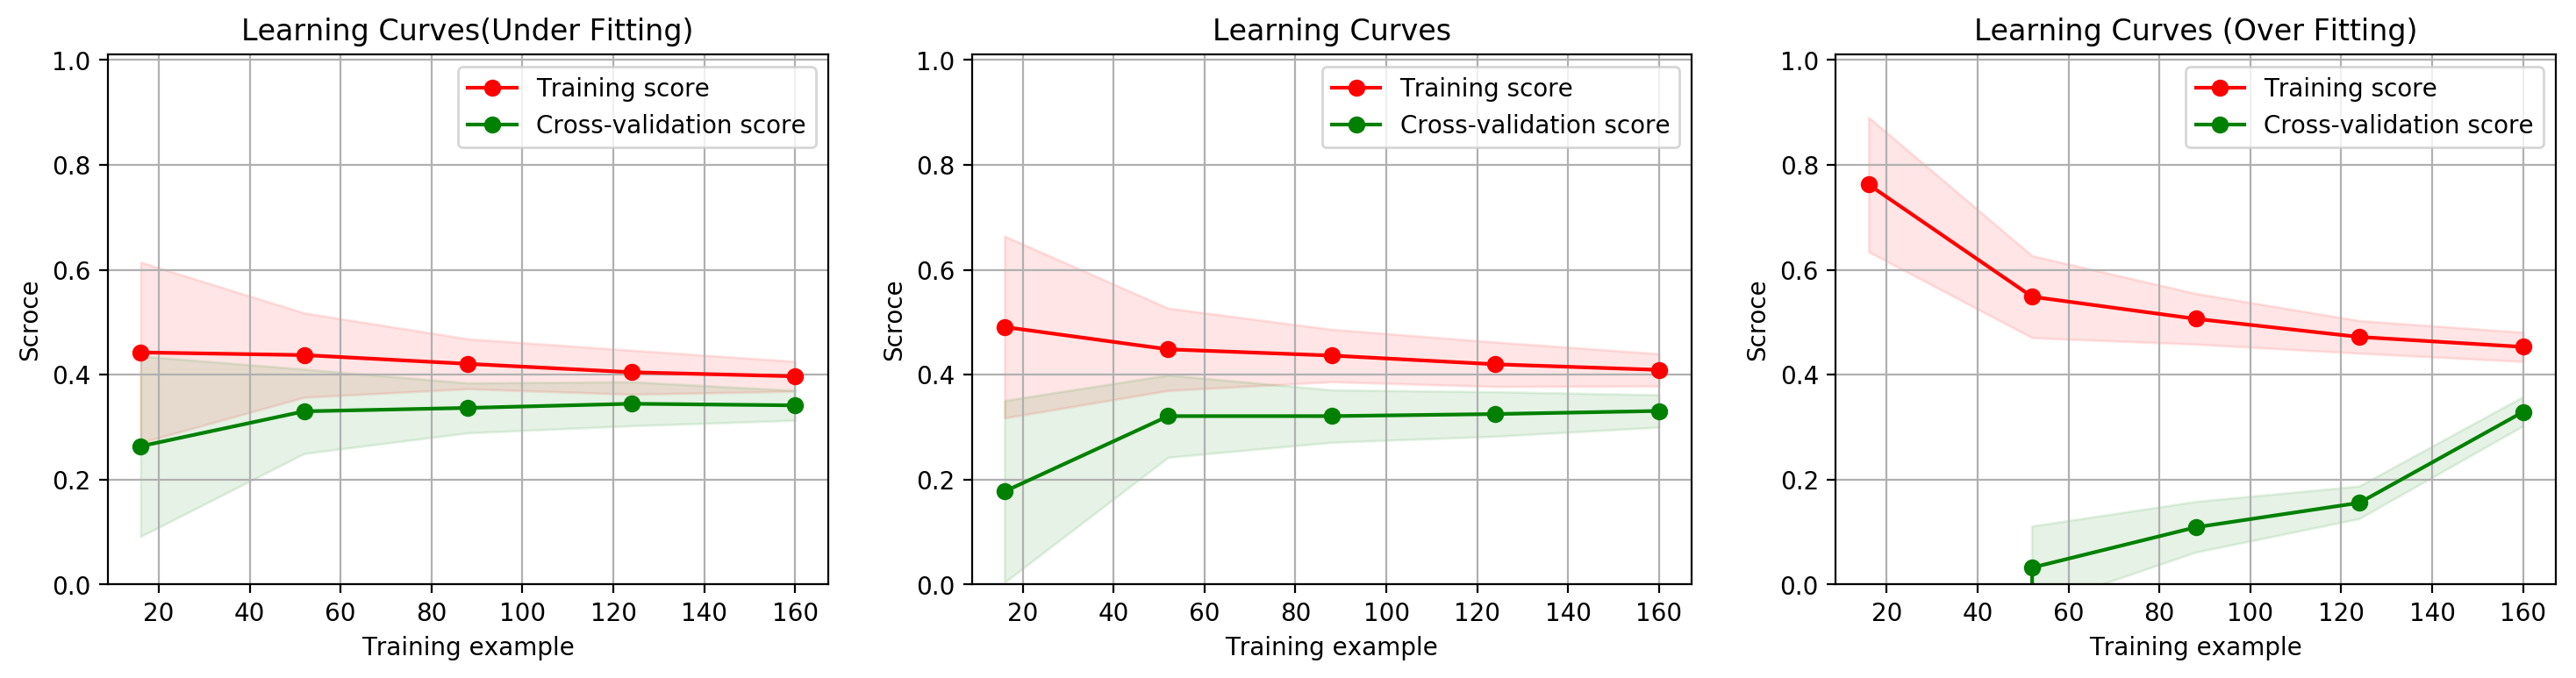

In [52]:
cv = ShuffleSplit(n_splits = 10,test_size = 0.2,random_state=0)
titles = ['Learning Curves(Under Fitting)','Learning Curves','Learning Curves (Over Fitting)']
degrees = [1,3,10]
plt.figure(figsize=(18,4),dpi=200)
for i in range(len(degrees)):
    plt.subplot(1,3,i+1)
    plot_learning_curve(polynomial_model(degrees[i]),titles[i],X,Y,ylim=(0.0,1.01),cv = cv)
#plt.show()